# 导入相关库

In [13]:
# 图数据挖掘
import networkx as nx

# 数据可视化
import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签  
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

# 数据读取

In [3]:
import pandas as pd
df = pd.read_csv('chess_masters_WCC.csv')
df

,Event,Site,Date,EventDate,ECO,Round,White,Black,Result,Moves
0,World Championship 1st,USA,1886.01.11,1886.01.11,D11,1,"Zukertort, Johannes H","Steinitz, Wilhelm",0-1,d2d4 d7d5 c2c4 c7c6 e2e3 c8f5 b1c3 e7e6 g1f3 b...
1,World Championship 1st,USA,1886.01.13,1886.01.11,C47,2,"Steinitz, Wilhelm","Zukertort, Johannes H",0-1,e2e4 e7e5 g1f3 b8c6 d2d4 e5d4 f3d4 g8f6 b1c3 f...
2,World Championship 1st,USA,1886.01.15,1886.01.11,D10,3,"Zukertort, Johannes H","Steinitz, Wilhelm",1-0,d2d4 d7d5 c2c4 c7c6 e2e3 c8f5 a2a3 e7e6 c4c5 a...
3,World Championship 1st,USA,1886.01.18,1886.01.11,C67,4,"Steinitz, Wilhelm","Zukertort, Johannes H",0-1,e2e4 e7e5 g1f3 b8c6 f1b5 g8f6 e1g1 f6e4 f1e1 e...
4,World Championship 1st,USA,1886.01.20,1886.01.11,D10,5,"Zukertort, Johannes H","Steinitz, Wilhelm",1-0,d2d4 d7d5 c2c4 c7c6 b1c3 g8f6 e2e3 c8f5 c4d5 c...
...,...,...,...,...,...,...,...,...,...,...
680,World Championship 31th,Moscow RUS,1985.01.21,1984.09.10,C92,44,"Kasparov, Gary","Karpov, Anatoly",1/2-1/2,e2e4 e7e5 g1f3 b8c6 f1b5 a7a6 b5a4 g8f6 e1g1 f...
681,World Championship 31th,Moscow RUS,1985.01.23,1984.09.10,B85,45,"Karpov, Anatoly","Kasparov, Gary",1/2-1/2,e2e4 c7c5 g1f3 d7d6 d2d4 c5d4 f3d4 g8f6 b1c3 a...
682,World Championship 31th,Moscow RUS,1985.01.28,1984.09.10,C92,46,"Kasparov, Gary","Karpov, Anatoly",1/2-1/2,e2e4 e7e5 g1f3 b8c6 f1b5 a7a6 b5a4 g8f6 e1g1 f...
683,World Championship 31th,Moscow RUS,1985.01.30,1984.09.10,D52,47,"Karpov, Anatoly","Kasparov, Gary",0-1,g1f3 g8f6 c2c4 e7e6 d2d4 d7d5 b1c3 c7c6 c1g5 b...


# 从连接表构建多路有向图

In [4]:
G = nx.from_pandas_edgelist(df, 'White', 'Black', edge_attr=True, create_using=nx.MultiDiGraph())
print('棋手（节点）个数', G.number_of_nodes())
print('棋局（连接）个数', G.number_of_edges())

棋手（节点）个数 25
棋局（连接）个数 685


In [5]:
# 所有节点
G.nodes

#所有连接（带特征）
G.edges(data=True)

OutMultiEdgeDataView([('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.11', 'EventDate': '1886.01.11', 'ECO': 'D11', 'Round': 1, 'Result': '0-1', 'Moves': 'd2d4 d7d5 c2c4 c7c6 e2e3 c8f5 b1c3 e7e6 g1f3 b8d7 a2a3 f8d6 c4c5 d6c7 b2b4 e6e5 f1e2 g8f6 c1b2 e5e4 f3d2 h7h5 h2h3 d7f8 a3a4 f8g6 b4b5 g6h4 g2g3 h4g2 e1f1 g2e3 f2e3 c7g3 f1g2 g3c7 d1g1 h8h6 g2f1 h6g6 g1f2 d8d7 b5c6 b7c6 h1g1 f5h3 f1e1 f6g4 e2g4 h3g4 c3e2 d7e7 e2f4 g6h6 b2c3 g7g5 f4e2 h6f6 f2g2 f6f3 d2f1 a8b8 e1d2 f7f5 a4a5 f5f4 g1h1 e7f7 a1e1 f4e3 f1e3 f3f2 g2f2 f7f2 e3g4 c7f4 d2c2 h5g4 c3d2 e4e3 d2c1 f2g2 c2c3 e8d7 h1h7 d7e6 h7h6 e6f5 c1e3 f4e3 e1f1 e3f4'}), ('Zukertort, Johannes H', 'Steinitz, Wilhelm', {'Event': 'World Championship 1st', 'Site': 'USA', 'Date': '1886.01.15', 'EventDate': '1886.01.11', 'ECO': 'D10', 'Round': 3, 'Result': '1-0', 'Moves': 'd2d4 d7d5 c2c4 c7c6 e2e3 c8f5 a2a3 e7e6 c4c5 a7a5 d1b3 d8c7 b1c3 b8d7 c3a4 g8f6 g1e2 f8e7 e2g3 f5g6 c1d2 e8g8 f1e2

In [6]:
# 两个棋手的所有棋局
G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm')

{0: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.11',
  'EventDate': '1886.01.11',
  'ECO': 'D11',
  'Round': 1,
  'Result': '0-1',
  'Moves': 'd2d4 d7d5 c2c4 c7c6 e2e3 c8f5 b1c3 e7e6 g1f3 b8d7 a2a3 f8d6 c4c5 d6c7 b2b4 e6e5 f1e2 g8f6 c1b2 e5e4 f3d2 h7h5 h2h3 d7f8 a3a4 f8g6 b4b5 g6h4 g2g3 h4g2 e1f1 g2e3 f2e3 c7g3 f1g2 g3c7 d1g1 h8h6 g2f1 h6g6 g1f2 d8d7 b5c6 b7c6 h1g1 f5h3 f1e1 f6g4 e2g4 h3g4 c3e2 d7e7 e2f4 g6h6 b2c3 g7g5 f4e2 h6f6 f2g2 f6f3 d2f1 a8b8 e1d2 f7f5 a4a5 f5f4 g1h1 e7f7 a1e1 f4e3 f1e3 f3f2 g2f2 f7f2 e3g4 c7f4 d2c2 h5g4 c3d2 e4e3 d2c1 f2g2 c2c3 e8d7 h1h7 d7e6 h7h6 e6f5 c1e3 f4e3 e1f1 e3f4'},
 1: {'Event': 'World Championship 1st',
  'Site': 'USA',
  'Date': '1886.01.15',
  'EventDate': '1886.01.11',
  'ECO': 'D10',
  'Round': 3,
  'Result': '1-0',
  'Moves': 'd2d4 d7d5 c2c4 c7c6 e2e3 c8f5 a2a3 e7e6 c4c5 a7a5 d1b3 d8c7 b1c3 b8d7 c3a4 g8f6 g1e2 f8e7 e2g3 f5g6 c1d2 e8g8 f1e2 f8b8 e1g1 b7b6 c5b6 d7b6 a4b6 b8b6 b3c3 c7b7 a1a2 f6d7 e2d1 c6c5 d1a4 c5c4 c3c1 

# 初步可视化

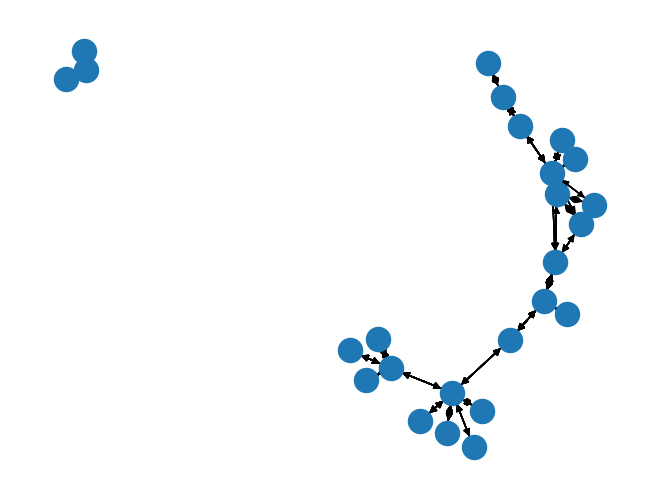

In [7]:
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)

# 连通域分析

In [8]:
# 将G转为无向图，分析连通域
H = G.to_undirected()
for each in nx.connected_components(H):
    print('连通域')
    print(H.subgraph(each))
    print('包含节点')
    print(each)
    print('\n')

连通域
MultiGraph with 22 nodes and 304 edges
包含节点
{'Lasker, Emanuel', 'Schlechter, Carl', 'Janowski, Dawid M', 'Alekhine, Alexander A', 'Petrosian, Tigran V', 'Gunsberg, Isidor A', 'Marshall, Frank J', 'Bronstein, David I', 'Fischer, Robert J', 'Smyslov, Vassily V', 'Botvinnik, Mikhail M', 'Chigorin, Mikhail I', 'Bogoljubow, Efim D', 'Spassky, Boris V', 'Tal, Mikhail N', 'Keres, Paul', 'Capablanca, Jose Raul', 'Tarrasch, Siegbert', 'Zukertort, Johannes H', 'Steinitz, Wilhelm', 'Reshevsky, Samuel H', 'Euwe, Max'}


连通域
MultiGraph with 3 nodes and 49 edges
包含节点
{'Kasparov, Gary', 'Karpov, Anatoly', 'Korchnoi, Viktor L'}




# 高级可视化

In [9]:
# 将G转为无向-单连接图
H = nx.Graph(G)

In [10]:
# 两个棋手的所有棋局
len(G.get_edge_data('Zukertort, Johannes H', 'Steinitz, Wilhelm'))

10

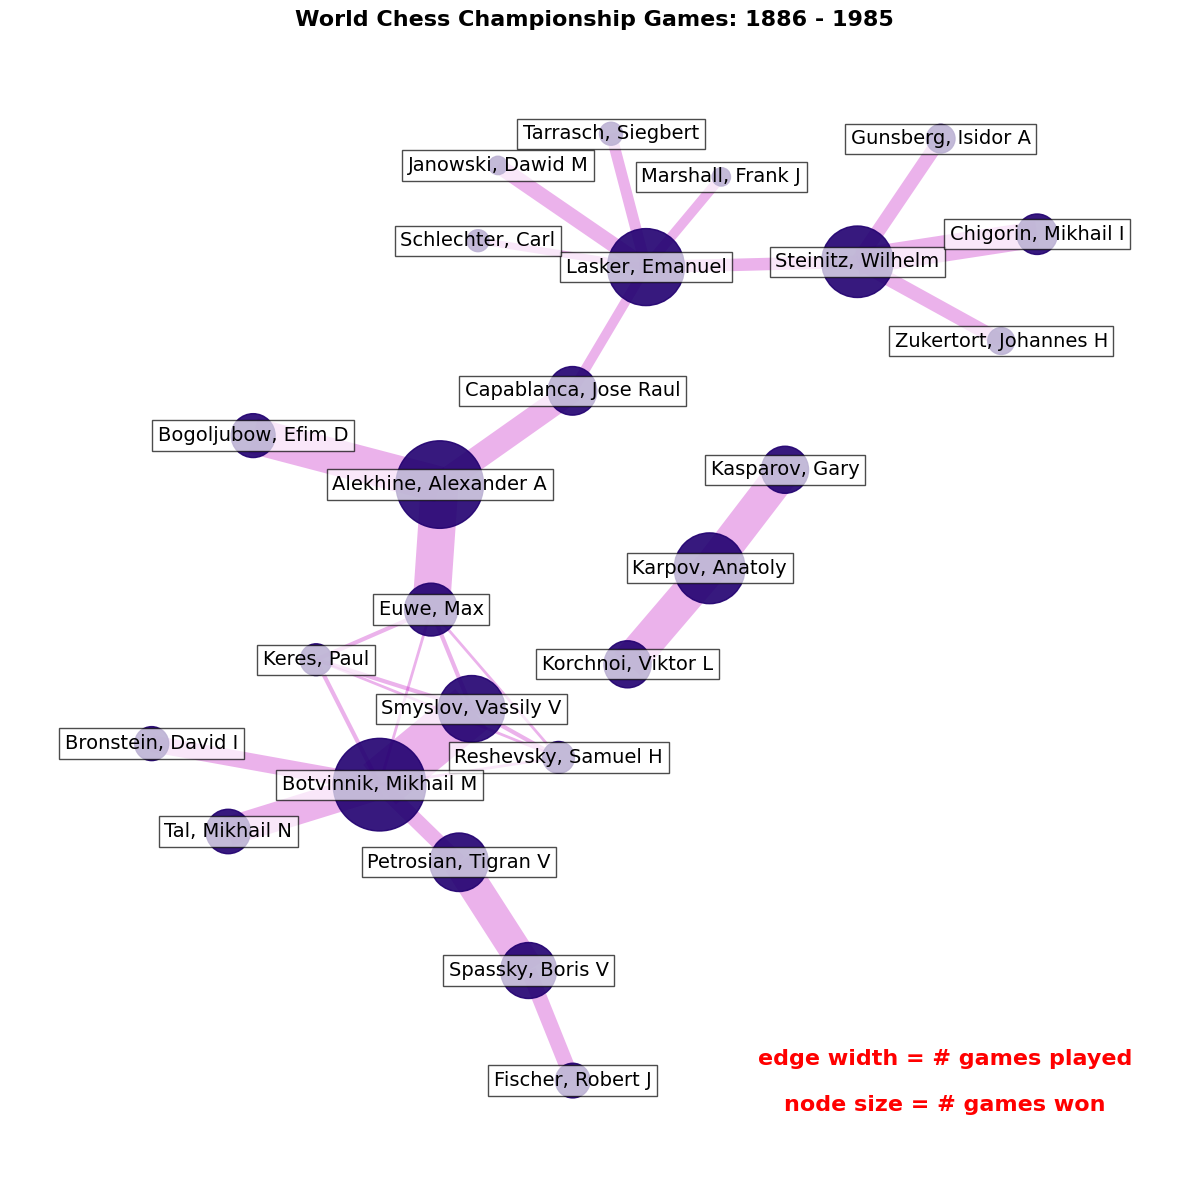

In [18]:
import scipy
# 两个棋手节点之间的 连接宽度 与 棋局个数 成正比
edgewidth = [len(G.get_edge_data(u, v)) for u, v in H.edges()]
# 棋手节点的大小 与 赢棋次数 成正比
wins = dict.fromkeys(G.nodes(), 0) # 生成每个棋手作为key的dict
for (u, v, d) in G.edges(data=True):
    r = d["Result"].split("-")
    if r[0] == "1":
        wins[u] += 1.0
    elif r[0] == "1/2":
        wins[u] += 0.5
        wins[v] += 0.5
    else:
        wins[v] += 1.0
nodesize = [wins[v] * 50 for v in H]

# 布局
pos = nx.kamada_kawai_layout(H)

# 手动微调节点的横坐标（越大越靠右）、纵坐标（越大越靠下）
pos["Reshevsky, Samuel H"] += (0.05, -0.10)
pos["Botvinnik, Mikhail M"] += (0.03, -0.06)
pos["Smyslov, Vassily V"] += (0.05, -0.03)

fig, ax = plt.subplots(figsize=(12, 12))

# 可视化连接
nx.draw_networkx_edges(H, pos, alpha=0.3, width=edgewidth, edge_color="m")

# 可视化节点
nx.draw_networkx_nodes(H, pos, node_size=nodesize, node_color="#210070", alpha=0.9)

# 节点名称文字说明
label_options = {"ec": "k", "fc": "white", "alpha": 0.7}
nx.draw_networkx_labels(H, pos, font_size=14, bbox=label_options)

# 标题和图例
font = {"fontname": "sans-serif", "color": "k", "fontweight": "bold", "fontsize": 16}
ax.set_title("World Chess Championship Games: 1886 - 1985", font)
# 图例字体颜色
font["color"] = "r"

# 文字说明
ax.text(
    0.80,
    0.10,
    "edge width = # games played",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = # games won",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# 调整图的大小，提高可读性
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()